### Código, implementación y discusión del problema de reconocimiento de dígitos

Integrantes del grupo:
* Juan David Bernal Vesga
* Oscar David Ordóñez Bolaños
* Juan Pablo Urrutia Parrado

A continuación, se muestra el paso a paso de la implementación de la solución, así como también la discusión de algunos resultados

Para ejecutar el cuaderno, se deben cumplir los siguientes requerimientos:

* Para este propósito se usa `Python 3.10.0` como la versión de ejecución.
* Se deben tener las librerías instaladas, las cuales se encuentran en `requirements.txt`

    `Nota:` para instalar las librerías, ejecutar en la terminal el siguiente comando: `pip install -r requirements.txt`

#### Dataset utilizado

Primeramente, se importan las librerías usadas para nuestro propósito, y se definen algunas funciones que sirven como herramientas para el análisis.

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import keras
import numpy as np

El dataset que se usa es el `mnist`, el cual es un dataset de 60.000 entradas para entrenar y 10.000 para validar, como se muestra a continuación:

In [2]:
# Import dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Examine dataset shapes
print(x_train.shape, x_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (10000, 28, 28)


Visualizando algunos datos del dataset, vemos que son de tamaño 28x28 y están centrados, como se muestra a continuación:

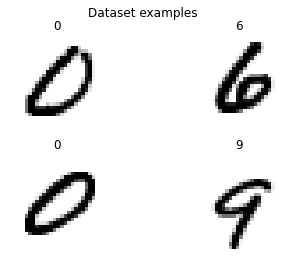

In [3]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Dataset examples')
test = np.random.randint(0,10000)
ax1.imshow(x_test[test], cmap="binary")
ax1.title.set_text(y_test[test])
ax1.axis('off')
ax2.imshow(x_test[test+1], cmap="binary")
ax2.title.set_text(y_test[test+1])
ax2.axis('off')
ax3.imshow(x_test[test+2], cmap="binary")
ax3.title.set_text(y_test[test+2])
ax3.axis('off')
ax4.imshow(x_test[test+3], cmap="binary")
ax4.title.set_text(y_test[test+3])
ax4.axis('off');

Ahora que se ha visto la estructura de los datos, los preparamos para ser usados por el modelo.

#### Creación del modelo inicial

Para trabajar con la API de Keras, se debe trabajar con imagenes de formato (M x N x 1). Se usa el método .reshape() para realizar esta acción. Finalmente, se normalizan los datos de la imagen dividiendo cada valor de píxel por 255 (ya que los valores RGB pueden variar de 0 a 255). Además, se necesita convertir la variable de verificación de `int` a categorías, ya que se trabajan con categorias del 0 al 9. Esto se puede lograr con la función to_categorical():

In [4]:
# Reshape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Parse and normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Turn Y into categorical data
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Para el modelo inicial, se considera crear:
* 2 capas de convolución para abstraer la informacián de las imágenes, una de 32 neuronas y otra de 64 neuronas.
* Una capa de `Dropout` con probabilidad de 25%. Estas son capas diseñadas para desestimar aleatoriamente la salida de las convoluciones, reduciendo así un posible overfit, como veremos más adelante.
* Una capa oculta de procesamiento de 128 neuronas.
* Una segunda capa de `Dropout` con probabilidad de 25%.
* Una capa final con las 10 categorias esperadas.
* ADAM com función de optimización y categorical_crossentropy como función de pérdida.

Como sabemos exactamente cuales son los outputs esperados, esta solución se plantea como un modelo de aprendizaje supervisado.

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Create layers as explained before
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(28, 28, 1)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model using adam as optimizer and categorical_crossentropy as the loss function
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

#### Entrenamiento del modelo

Para entrenar el modelo, hacemos 20 corridas de 128 datos por cada corrida. Esto con el fin de ajustar los parámetros al final de cada corrida, haciendo backpropagation.

In [6]:
batch_size = 128
epochs = 20

og_model_hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save("src/models/og_model.h5")

Epoch 1/20
469/469 [==============================] - 18s 10ms/step - loss: 0.2418 - accuracy: 0.9261 - val_loss: 0.0511 - val_accuracy: 0.9839
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0836 - accuracy: 0.9747 - val_loss: 0.0395 - val_accuracy: 0.9876
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0643 - accuracy: 0.9809 - val_loss: 0.0312 - val_accuracy: 0.9901
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0512 - accuracy: 0.9846 - val_loss: 0.0293 - val_accuracy: 0.9898
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0442 - accuracy: 0.9863 - val_loss: 0.0283 - val_accuracy: 0.9909
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0376 - accuracy: 0.9882 - val_loss: 0.0258 - val_accuracy: 0.9914
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0346 - accuracy: 0.9888 - val_loss: 0.0264 - val_accuracy: 0.9912
Ep

In [7]:
original_model = keras.models.load_model('src/models/og_model.h5')

A continuación, una prueba sobre un dato aislado:

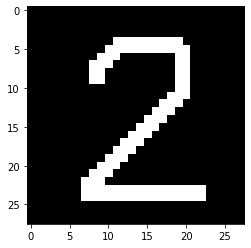

In [19]:
import imageio

# Import and process the image
im = imageio.imread("img/2.png")
plt.imshow(im, cmap = plt.get_cmap('gray'))
plt.show()
gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
gray = gray.reshape(1, 28, 28, 1)
gray /= 255

In [20]:
# Use the model to predict
prediction = model.predict(gray)
print(prediction.argmax())

1/1 [==============================] - 0s 17ms/step
2


Como vemos, el modelo predice correctamente sobre la imagen suministrada.

#### Problemas de Overfitting

Haciendo un análisis sobre el porcentaje de error del modelo anterior, se puede ver lo siguiente:

In [11]:
# Aux. function to graph results
def eval_metric(model, history, metric_name, name):
    '''
    Function to evaluate a trained model on a chosen metric. 
    Training and validation metric are plotted in a
    line chart for each epoch.
    
    Parameters:
        history : model training history
        metric_name : loss or accuracy
    Output:
        line chart with epochs of x-axis and metric on
        y-axis
    '''
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]
    e = range(1, 20 + 1)
    plt.plot(e, metric, label='Entrenamiento ' + metric_name)
    plt.plot(e, val_metric, label='Validación ' + metric_name)
    plt.xlabel('Epoch')
    plt.ylabel(metric_name)
    plt.title('Comparación ' + metric_name + ' de entrenamiento y validación para ' + name)
    plt.legend()
    plt.show()

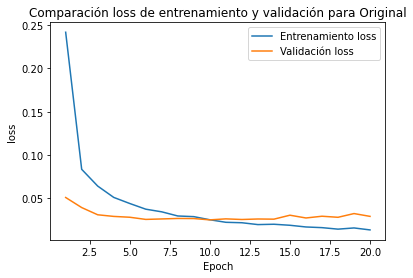

In [12]:
eval_metric(original_model, og_model_hist, 'loss', 'Original')

El modelo original presenta sintomas de 'overfitting'. Esto es, cuando el modelo queda sobre-entrenado sobre un dataset, tanto que es incapaz de reconocer digitos de manera generalizada. Esto se puede detectar encontrando que a medida que se entrena el modelo, el loss (porcentaje de error) sobre el dataset de entreno baja, mientras que el loss sobre el dataset de validación se mantiene o sube. Para la primera implementación del modelo, se implementan 'Dropout layers'; sin embargo, parece no ser suficiente para resolver el problema. Aunque no es muy grave, se puede ver como el loss sobre el set de validación deja de disminuir en el octavo entrenamiento, y luego sube. Para atacar este problema, se plantean algunas estrategias:

##### 1. Reducir el número de neuronas de la capa de segunda convolucion de 64 a 32, y de la capa oculta de 128 a 64.
Asi se reduce la capacidad de la red y se obliga a aprender los patrones que importan o que minimizan la pérdida.

In [13]:
# Create layers as explained before
model_1 = Sequential()
model_1.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(28, 28, 1)))

model_1.add(Conv2D(32, (3, 3), activation='relu'))       ## 64 -> 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Dropout(0.25))

model_1.add(Flatten())

model_1.add(Dense(64, activation='relu'))               ## 128 ->64
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='softmax'))

# Compile the model_1 using adam as optimizer and categorical_crossentropy as the loss function
model_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3600 - accuracy: 0.8884 - val_loss: 0.0731 - val_accuracy: 0.9745
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1416 - accuracy: 0.9584 - val_loss: 0.0464 - val_accuracy: 0.9854
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1083 - accuracy: 0.9680 - val_loss: 0.0388 - val_accuracy: 0.9867
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0911 - accuracy: 0.9725 - val_loss: 0.0361 - val_accuracy: 0.9885
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0816 - accuracy: 0.9760 - val_loss: 0.0329 - val_accuracy: 0.9894
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0735 - accuracy: 0.9779 - val_loss: 0.0320 - val_accuracy: 0.9893
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0662 - accuracy: 0.9795 - val_loss: 0.0300 - val_accuracy: 0.9897
Epoch 

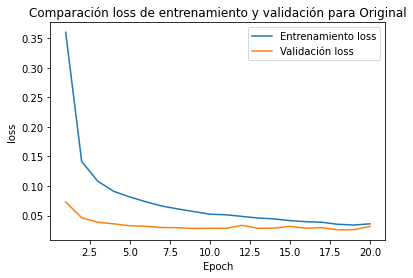

In [14]:
batch_size = 128
epochs = 20

small_model_hist = model_1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model_1.save("src/models/small_model.h5")

eval_metric(model_1, small_model_hist, 'loss', 'Original')

##### 2. Aplicar regularización a la segunda capa de convolución.
Esto añade un coste a la función de pérdida del modelo para los parámetros grandes. Como resultado, se obtiene un modelo más simple que se verá obligado a aprender sólo los patrones relevantes de los datos de entrenamiento. La regularización L2 añade un coste con respecto al valor cuadrado de los parámetros. Esto da lugar a pesos más pequeños para cada neurona.

In [15]:
# Create layers as explained before
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(28, 28, 1), kernel_regularizer=keras.regularizers.l2(0.01), bias_regularizer=keras.regularizers.l2(0.01)))      ## Add regularizers

model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Dropout(0.25))

model_2.add(Flatten())

model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(10, activation='softmax'))

# Compile the model_2 using adam as optimizer and categorical_crossentropy as the loss function
model_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2832 - accuracy: 0.9190 - val_loss: 0.0735 - val_accuracy: 0.9829
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1113 - accuracy: 0.9717 - val_loss: 0.0521 - val_accuracy: 0.9879
Epoch 3/20
469/469 [==============================] - 4s 10ms/step - loss: 0.0833 - accuracy: 0.9779 - val_loss: 0.0481 - val_accuracy: 0.9881
Epoch 4/20
469/469 [==============================] - 4s 10ms/step - loss: 0.0702 - accuracy: 0.9811 - val_loss: 0.0403 - val_accuracy: 0.9900
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0614 - accuracy: 0.9838 - val_loss: 0.0366 - val_accuracy: 0.9897
Epoch 6/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0563 - accuracy: 0.9847 - val_loss: 0.0381 - val_accuracy: 0.9893
Epoch 7/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0508 - accuracy: 0.9862 - val_loss: 0.0356 - val_accuracy: 0.9903

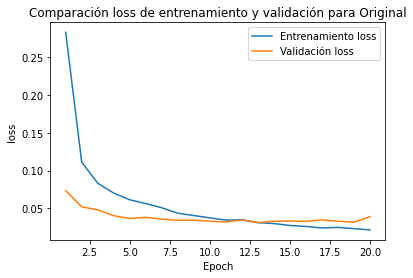

In [16]:
batch_size = 128
epochs = 20

reg_model_hist = model_2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model_2.save("src/models/conv_reg_model.h5")

eval_metric(model_2, reg_model_hist, 'loss', 'Original')

Al combinar las anteriores dos soluciones, se obtiene la solución final:

In [17]:
# Create layers as explained before
model_3 = Sequential()
model_3.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(28, 28, 1), kernel_regularizer=keras.regularizers.l2(0.01), bias_regularizer=keras.regularizers.l2(0.01)))      ## Add regularizers

model_3.add(Conv2D(32, (3, 3), activation='relu'))          ## 64 -> 32
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Dropout(0.25))

model_3.add(Flatten())

model_3.add(Dense(64, activation='relu'))                   ## 128 -> 64
model_3.add(Dropout(0.5))
model_3.add(Dense(10, activation='softmax'))

# Compile the model_3 using adam as optimizer and categorical_crossentropy as the loss function
model_3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4071 - accuracy: 0.8810 - val_loss: 0.1034 - val_accuracy: 0.9716
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1783 - accuracy: 0.9521 - val_loss: 0.0714 - val_accuracy: 0.9822
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1402 - accuracy: 0.9621 - val_loss: 0.0569 - val_accuracy: 0.9849
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1206 - accuracy: 0.9678 - val_loss: 0.0537 - val_accuracy: 0.9857
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1065 - accuracy: 0.9711 - val_loss: 0.0474 - val_accuracy: 0.9875
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0964 - accuracy: 0.9744 - val_loss: 0.0435 - val_accuracy: 0.9886
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0896 - accuracy: 0.9754 - val_loss: 0.0432 - val_accuracy: 0.9888
Epoch 

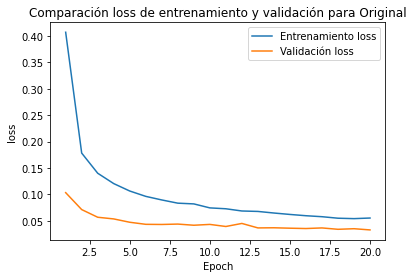

In [18]:
batch_size = 128
epochs = 20

small_conv_reg_hist = model_3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model_3.save("src/models/small_conv_reg_model.h5")

eval_metric(model_3, small_conv_reg_hist, 'loss', 'Original')

Vemos entonces que el modelo no presenta 'overfitting' y está listo para ser usado por el usuario final.